# Fourier Series

## Sine and Cosine Series

The Fourier series of a function $f(x)$ is given by

$$  f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos \left( \frac{n \pi x}{L} \right) + b_n \sin \left( \frac{n \pi x}{L} \right) \right] $$

where

$$ a_n = \frac{1}{L} \int_{-L}^{L} f(x) \cos \left( \frac{n \pi x}{L} \right) dx $$
$$ b_n = \frac{1}{L} \int_{-L}^{L} f(x) \sin \left( \frac{n \pi x}{L} \right) dx $$

and $L$ is the period of the function.


## Example 1

Find the Fourier series of the function $f(x) = x$ for $-1 \leq x \leq 1$.

### Solution

We have $L = 1$ and

$$ a_n = \frac{1}{1} \int_{-1}^{1} x \cos \left( n \pi x \right) dx = \left[ \frac{n \pi x \sin(n \pi x) + \cos(n \pi x)}{n^2 \pi^2} \right]_{-1}^1 = 0$$

and

$$ b_n = \frac{1}{1} \int_{-1}^{1} x \sin \left( n \pi x \right) dx = 
\left[ \frac{\sin(n \pi x) - n \pi x \cos(n \pi x)}{n^2 \pi^2} \right]_{-1}^1 = \frac{2\sin(n \pi) - 2 n \pi \cos(n \pi)}{n^2 \pi^2}$$
$$ b_n = -\frac{2}{n \pi} \left( -1 \right)^n $$

Therefore, the Fourier series is

$$ f(x) = \sum_{n=1}^{\infty} -\frac{2}{n \pi} \left( -1 \right)^n \sin \left( n \pi x \right) $$

Looking at the first few terms, we have

$$ f(x) = -\frac{2}{\pi} \sin(\pi x) + \frac{2}{2 \pi} \sin(2 \pi x) - \frac{2}{3 \pi} \sin(3 \pi x) + \frac{2}{4 \pi} \sin(4 \pi x) - \frac{2}{5 \pi} \sin(5 \pi x) + \cdots $$

$$ = -\frac{2}{\pi}  \left( \sin(\pi x) - \frac{1}{2} \sin(2 \pi x) + \frac{1}{3} \sin(3 \pi x) - \frac{1}{4} \sin(4 \pi x) + \frac{1}{5} \sin(5 \pi x) - \cdots \right) $$



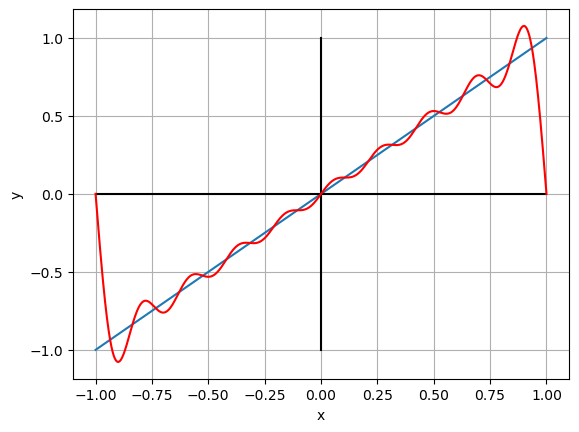

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 1000)
y = x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# plot axes
plt.plot([-1, 1], [0, 0], 'k')
plt.plot([0, 0], [-1, 1], 'k')

# calculate the first 10 terms of the Fourier series

n = np.arange(1, 10)

yf = np.zeros(len(x))

for i in range(len(n)):
    yf = yf - 2 / (n[i] * np.pi) * ( (-1) ** n[i] ) * np.sin(n[i] * np.pi * x)
    
plt.plot(x, yf, 'r')


# Complex Fourier Series

The complex Fourier series approximation of a function $f(x)$ is given by the real part of

$$  f_{Fourier}(x) = \sum_{n=-\infty}^{\infty} c_n e^{i n \pi x/L} $$

where

$$ c_n = \frac{1}{2L} \int_{-L}^{L} f(x) e^{-i n \pi x/L} dx $$

and $L$ is the period of the function.

The coefficients $c_n$ are called the (complex) Fourier coefficients.

Let's expand the regular Fourier series to see that it is equivalent to the complex Fourier series.

We use that  $\cos(\theta) = \frac{1}{2} \left( e^{i \theta} + e^{-i \theta} \right)$ and $\sin(\theta) = \frac{1}{2i} \left( e^{i \theta} - e^{-i \theta} \right)$.

Thus, we can write the Fourier series as

$$ f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \frac{1}{2} \left( e^{i n \pi x/L} + e^{-i n \pi x/L} \right) + b_n \frac{1}{2i} \left( e^{i n \pi x/L} - e^{-i n \pi x/L} \right) \right] $$
$$ f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ \frac{a_n - i b_n}{2} e^{i n \pi x/L} + \frac{a_n + i b_n}{2} e^{-i n \pi x/L} \right] $$

Comparing this to the complex Fourier series, we see that the coefficients are related by

$$ c_0 = \frac{a_0}{2} $$
$$ c_n = \frac{a_n - i b_n}{2} $$
$$ c_{-n} = \frac{a_n + i b_n}{2} $$
$$ a_n = c_n + c_{-n} $$
$$ b_n = i \left( c_n - c_{-n} \right) $$



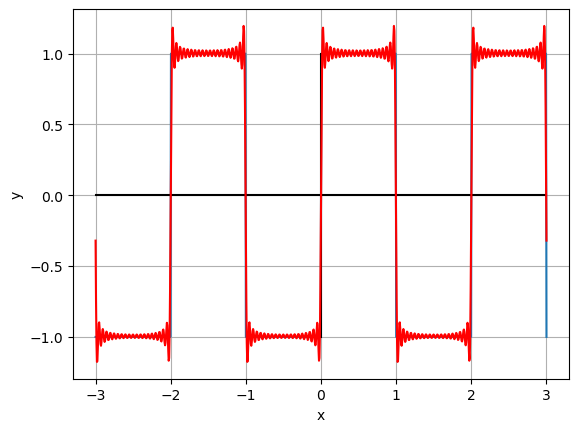

In [4]:
# Let's use a complex Fourier series to approximate a square wave with a period of 2 from -3 to 3

n_terms = 40

from scipy import signal

x = np.linspace(-3, 3, 1000)
period = 2 
y = signal.square(2*np.pi * x/period)
        
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# plot axes
plt.plot([-3, 3], [0, 0], 'k')
plt.plot([0, 0], [-1, 1], 'k')

def cn(n):
    global y, x, period
    c = y* np.exp(-1j * 2 * np.pi * n * x/period)
    return c.sum() / len(x)

def f(x, Nh):
    global y, period
    f = np.array([2 * cn(i) * np.exp(1j * 2 * np.pi * i * x/period) for i in range(1, Nh+1)])
    return f.sum()

yf = np.array([f(t, n_terms) for t in x])

plt.plot(x, yf.real, 'r') 


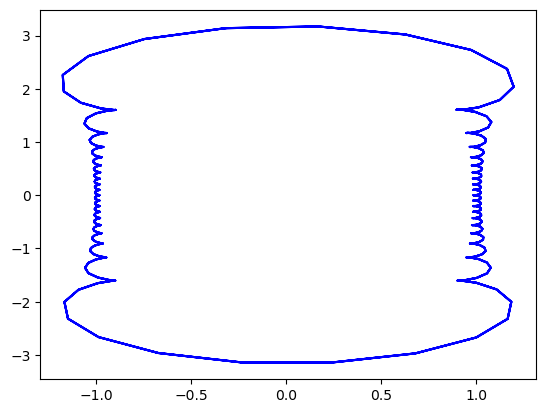

In [5]:
# Make a plot of the Fourier series in the complex plane

plt.plot(yf.real, yf.imag, 'b')

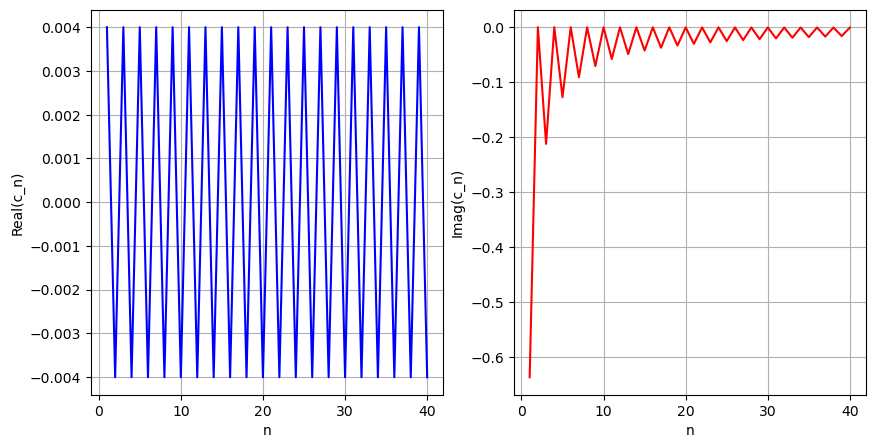

In [6]:
# Make a plot of the Fourier coefficients (real and imaginary parts)

n = np.arange(1, n_terms+1)
c = np.array([cn(i) for i in n])

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(n, c.real, 'b')
ax[1].plot(n, c.imag, 'r')
ax[0].set_xlabel('n')
ax[0].set_ylabel('Real(c_n)')
ax[1].set_xlabel('n')
ax[1].set_ylabel('Imag(c_n)')
ax[0].grid()
ax[1].grid()


# Let's generate some time series data and see if we can use a Fourier series to approximate it

Sampling frequency =  1000.0


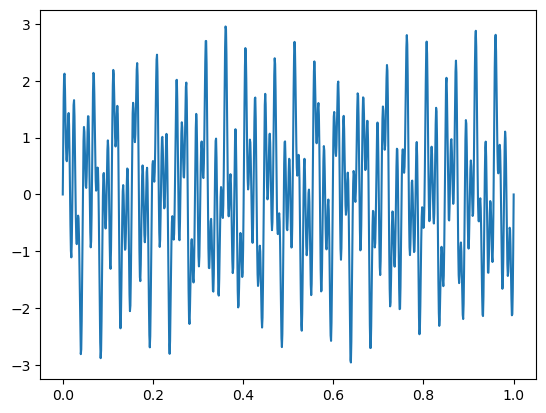

In [48]:
f1 = 20.0
f2 = 45.0
f3 = 92.0

x = np.linspace(0, 1, 1001)
y = np.sin(2 * np.pi * f1 * x) + np.sin(2 * np.pi * f2 * x) + np.sin(2 * np.pi * f3 * x)

plt.plot(x, y)

print('Sampling frequency = ', 1/(x[1]-x[0]))

max frequency =  100.0
min frequency =  1.0
Nyquist frequency =  0.5


(0.0, 0.1)

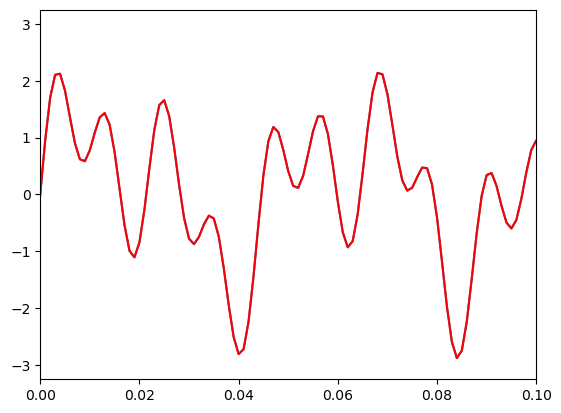

In [49]:
# Let's use a complex Fourier series to approximate the time series data

n_terms = 100

period = 1

print('max frequency = ', n_terms/period)
print('min frequency = ', 1/period)
print('Nyquist frequency = ', 0.5/period)

yf = np.array([f(t, n_terms) for t in x])

plt.plot(x, y)
plt.plot(x, yf.real, 'r')
plt.xlim(0, 0.1)


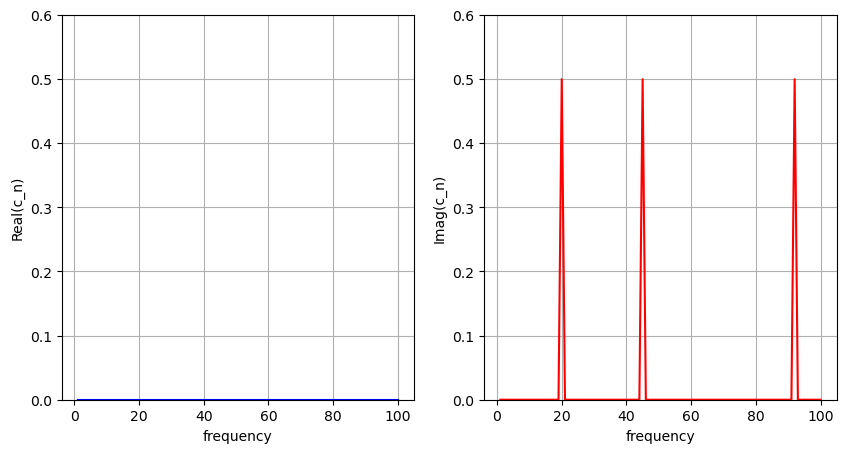

In [50]:
# Plot the Fourier coefficients

n = np.arange(1, n_terms+1)
freq = n/period
c = np.array([cn(i) for i in n])

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(freq, abs(c.real), 'b')
ax[1].plot(freq, abs(c.imag), 'r')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('Real(c_n)')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('Imag(c_n)')
ax[0].set_ylim(0, 0.6)
ax[1].set_ylim(0, 0.6)
ax[0].grid()
ax[1].grid()


# Average Power

We can calculate the power spectrum of a signal using the Fourier coefficients. The average power is given by

$$ P = \frac{1}{2L} \int_{-L}^{L} |f(x)|^2 dx = \sum_{n=-\infty}^{\infty} |c_n|^2 $$

where $L$ is the period of the function.  Thus, a plot of the power spectrum vs. frequency is given by plotting $|c_n|^2$ vs. $n/L$.

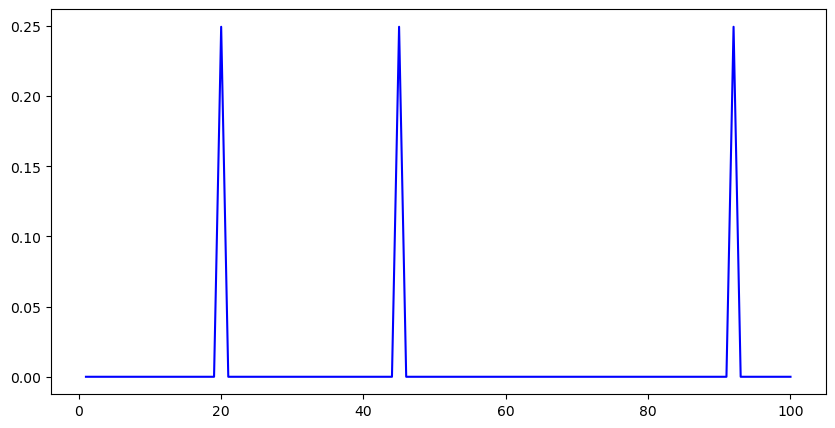

In [51]:
# Let's plot the power spectrum

fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.plot(freq, c.real**2+c.imag**2, 'b')